In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tikzplotlib

In [2]:
def condition_boxplot(df):
    ax = sns.boxplot(data=df, x="Condition", y="Sentence_score_(BERT)", width=0.5)
    sns.set_style("ticks")
    ax.set(xlabel=None)
    ax.set(ylabel=None)
    ax.set_xticklabels(['T-T', 'T-AT','AT-T', 'AT-AT', 'T-SP_v'])
    return ax

In [3]:
#upload the ellipsis dataset with probability scores

ellipsis_df = pd.read_csv('/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/ELLie.csv', sep = ",", index_col= 0)

ellipsis_df

,ID,Condition,Sentence,Construction,Semantic_Role,Sentence_score_(GPT),Sentence_score_(BERT)
0,1,T – T,"The photographer used the camera, and the repo...",VP-ellipsis,Agent,-4.402376,-1.970236
1,1,T – AT,"The photographer used the camera, and the butc...",VP-ellipsis,Agent,-4.866790,-2.733161
2,1,AT – T,"The grandfather used the camera, and the repor...",VP-ellipsis,Agent,-4.994553,-3.296983
3,1,AT – AT,"The grandfather used the camera, and the butch...",VP-ellipsis,Agent,-5.207554,-3.541741
4,1,T – SP violation,"The photographer used the camera, and the bike...",VP-ellipsis,Agent,-4.508457,-2.668523
...,...,...,...,...,...,...,...
570,115,T – T,"The tourist packed his bags before departure, ...",Pseudo-gapping,Time,-4.857551,-3.447699
571,115,T – AT,"The tourist packed his bags before departure, ...",Pseudo-gapping,Time,-4.841784,-3.416409
572,115,AT – T,The tourist packed his bags before the meeting...,Pseudo-gapping,Time,-4.687409,-3.594338
573,115,AT – AT,"The tourist packed his bags before meeting, an...",Pseudo-gapping,Time,-5.382345,-3.705495


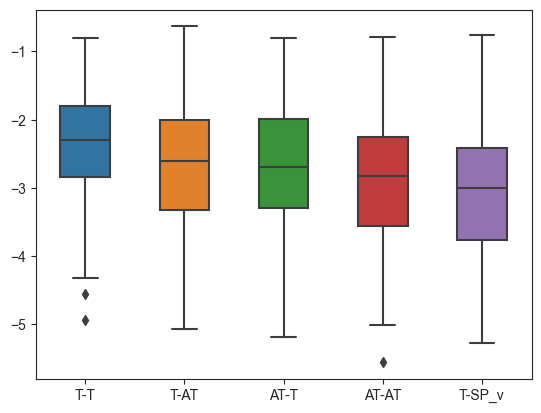

In [80]:
condition_boxplot(ellipsis_df)
plt.savefig("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/BERT_Sent_general_boxplot.png")
tikzplotlib.save("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/file_tex /BERT_Sent_general_boxplot.tex")

# Semantic Role: AGENT

In [4]:
#create an Agent subdataset from the ellipsis dataset
agent_df = ellipsis_df[ellipsis_df['Semantic_Role'] == 'Agent']
agent_df

,ID,Condition,Sentence,Construction,Semantic_Role,Sentence_score_(GPT),Sentence_score_(BERT)
0,1,T – T,"The photographer used the camera, and the repo...",VP-ellipsis,Agent,-4.402376,-1.970236
1,1,T – AT,"The photographer used the camera, and the butc...",VP-ellipsis,Agent,-4.866790,-2.733161
2,1,AT – T,"The grandfather used the camera, and the repor...",VP-ellipsis,Agent,-4.994553,-3.296983
3,1,AT – AT,"The grandfather used the camera, and the butch...",VP-ellipsis,Agent,-5.207554,-3.541741
4,1,T – SP violation,"The photographer used the camera, and the bike...",VP-ellipsis,Agent,-4.508457,-2.668523
...,...,...,...,...,...,...,...
120,25,T – T,"The child will lend a pen, and the usurer will...",Pseudo-gapping,Agent,-4.611095,-3.571546
121,25,T – AT,"The child will lend a pen, and the artist will...",Pseudo-gapping,Agent,-4.924663,-3.702566
122,25,AT – T,"The traveller will lend a pen, and the usurer ...",Pseudo-gapping,Agent,-4.824962,-2.694642
123,25,AT – AT,"The traveller will lend a pen, and the artist ...",Pseudo-gapping,Agent,-5.008638,-3.026119


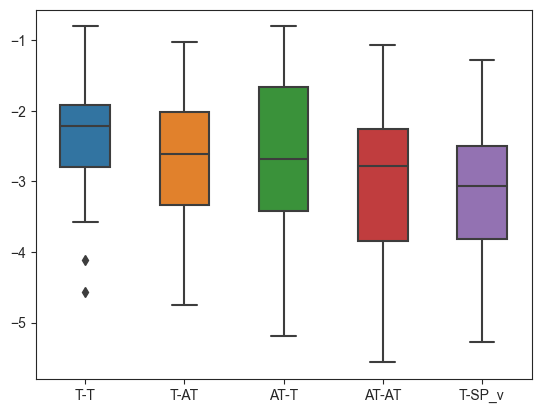

In [6]:
condition_boxplot(agent_df)
plt.savefig("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/BERT_Agent_boxplot.png")
tikzplotlib.save("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/file_tex /BERT_Agent_boxplot.tex")


In [7]:
# searching for the constructions used for this semantic role
agent_df.Construction.unique()

array(['VP-ellipsis', 'Do-x/ Do-so anaphora', 'Gapping', 'Pseudo-gapping'],
      dtype=object)

In [8]:
#From agent dataset create different subdatasets for each construction

agent_vp_df = agent_df[agent_df['Construction'] == 'VP-ellipsis']
agent_doAnaphora_df = agent_df[agent_df['Construction'] == 'Do-x/ Do-so anaphora']
agent_gapping_df = agent_df[agent_df['Construction'] == 'Gapping']
agent_pseudogapping_df = agent_df[agent_df['Construction'] == 'Pseudo-gapping']

## Verb-phrase ellipsis (VP)

In [9]:
# dataframe for verb-phrase ellipsis construction for Agent-semantic role
agent_vp_df

,ID,Condition,Sentence,Construction,Semantic_Role,Sentence_score_(GPT),Sentence_score_(BERT)
0,1,T – T,"The photographer used the camera, and the repo...",VP-ellipsis,Agent,-4.402376,-1.970236
1,1,T – AT,"The photographer used the camera, and the butc...",VP-ellipsis,Agent,-4.866790,-2.733161
2,1,AT – T,"The grandfather used the camera, and the repor...",VP-ellipsis,Agent,-4.994553,-3.296983
3,1,AT – AT,"The grandfather used the camera, and the butch...",VP-ellipsis,Agent,-5.207554,-3.541741
4,1,T – SP violation,"The photographer used the camera, and the bike...",VP-ellipsis,Agent,-4.508457,-2.668523
5,2,T – T,"The engineer completed the project, but the st...",VP-ellipsis,Agent,-5.201940,-4.565413
6,2,T – AT,"The engineer completed the project, but the cy...",VP-ellipsis,Agent,-5.391612,-4.748011
7,2,AT – T,"The child completed the project, but the stude...",VP-ellipsis,Agent,-5.347960,-4.436381
8,2,AT – AT,"The child completed the project, but the cycli...",VP-ellipsis,Agent,-5.682017,-5.014598
9,2,T – SP violation,"The engineer completed the project, but the ba...",VP-ellipsis,Agent,-5.446559,-5.278521


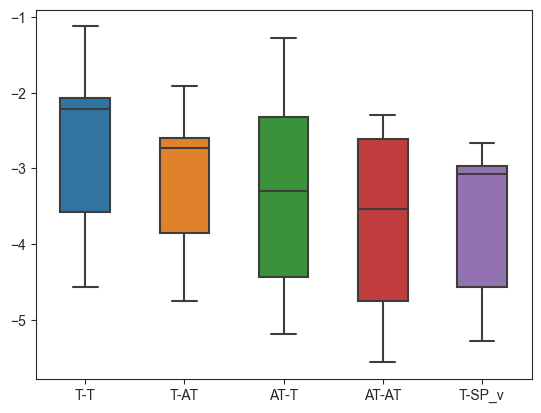

In [10]:
condition_boxplot(agent_vp_df)
plt.savefig("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/BERT_Agent_VP_boxplot.png")
tikzplotlib.save("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/file_tex /BERT_Agent_VP_boxplot.tex")


## Do-x/ Do-so anaphora

In [11]:
agent_doAnaphora_df

,ID,Condition,Sentence,Construction,Semantic_Role,Sentence_score_(GPT),Sentence_score_(BERT)
35,8,T – T,"The soldier wore a helmet, and so did the biker.",Do-x/ Do-so anaphora,Agent,-3.475001,-0.802291
36,8,T – AT,"The soldier wore a helmet, and so did the prof...",Do-x/ Do-so anaphora,Agent,-3.834262,-1.016768
37,8,AT – T,"The swimmer wore a helmet, and so did the biker.",Do-x/ Do-so anaphora,Agent,-3.529432,-1.101073
38,8,AT – AT,"The swimmer wore a helmet, and so did the prof...",Do-x/ Do-so anaphora,Agent,-3.742208,-1.566749
39,8,T – SP violation,"The soldier wore a helmet, and so did the tree.",Do-x/ Do-so anaphora,Agent,-3.802419,-1.281517
40,9,T – T,"The teacher helped the child, and the mother d...",Do-x/ Do-so anaphora,Agent,-3.444774,-1.160387
41,9,T – AT,"The teacher helped the child, and the cook did...",Do-x/ Do-so anaphora,Agent,-4.056174,-1.543844
42,9,AT – T,"The florist helped the child, and the mother d...",Do-x/ Do-so anaphora,Agent,-3.444873,-0.801533
43,9,AT – AT,"The florist helped the child, and the cook did...",Do-x/ Do-so anaphora,Agent,-4.108560,-1.061004
44,9,T – SP violation,"The teacher helped the child, and the boat did...",Do-x/ Do-so anaphora,Agent,-4.314497,-1.936571


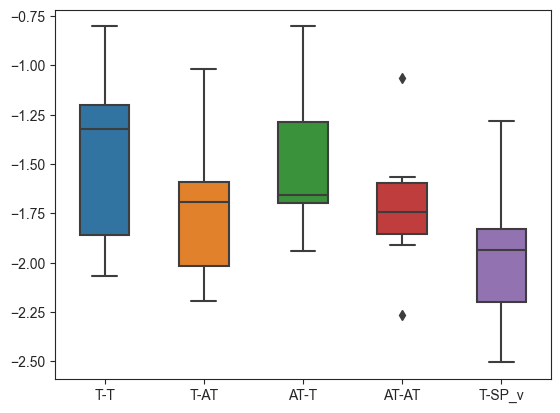

In [12]:
condition_boxplot(agent_doAnaphora_df)
plt.savefig("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/BERT_Agent_Do_ana_boxplot.png")
tikzplotlib.save("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/file_tex /BERT_Agent_Do_ana_boxplot.tex")


## Gapping

In [13]:
agent_gapping_df

,ID,Condition,Sentence,Construction,Semantic_Role,Sentence_score_(GPT),Sentence_score_(BERT)
70,15,T – T,"The pyromaniac starts the fire, and the pilot ...",Gapping,Agent,-4.340278,-2.754865
71,15,T – AT,"The pyromaniac starts the fire, and the singer...",Gapping,Agent,-4.253061,-2.569377
72,15,AT – T,"The biker starts the fire, and the pilot the r...",Gapping,Agent,-4.880644,-3.654390
73,15,AT – AT,"The biker starts the fire, and the singer the ...",Gapping,Agent,-4.999517,-3.303030
74,15,T – SP violation,"The pyromaniac starts the fire, and the leaf t...",Gapping,Agent,-4.500829,-3.567500
75,16,T – T,"The truck has hit the car, and the policeman t...",Gapping,Agent,-4.702888,-1.992102
76,16,T – AT,"The truck has hit the car, and the grandmother...",Gapping,Agent,-5.161477,-2.537331
77,16,AT – T,"The footballer has hit the car, and the police...",Gapping,Agent,-5.187562,-2.185190
78,16,AT – AT,"The footballer has hit the car, and the grandm...",Gapping,Agent,-5.520691,-2.958251
79,16,T – SP violation,"The truck has hit the car, and the air the dem...",Gapping,Agent,-5.335159,-2.831029


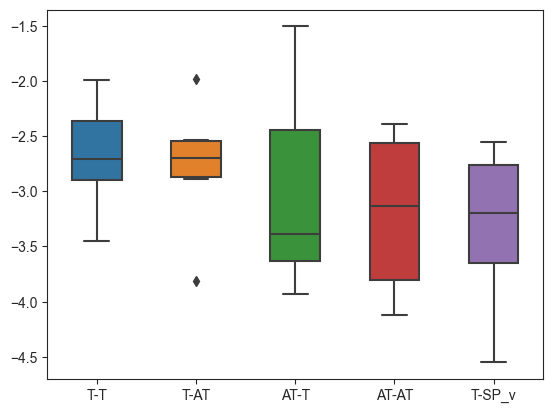

In [14]:
condition_boxplot(agent_gapping_df)
plt.savefig("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/BERT_Agent_Gapping_boxplot.png")
tikzplotlib.save("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/file_tex /BERT_Agent_Gapping_boxplot.tex")


## Pseudo-gapping

In [15]:
agent_pseudogapping_df

,ID,Condition,Sentence,Construction,Semantic_Role,Sentence_score_(GPT),Sentence_score_(BERT)
100,21,T – T,"The nurse will wash the infant, and the hairst...",Pseudo-gapping,Agent,-4.198437,-2.304201
101,21,T – AT,"The nurse will wash the infant, and the banker...",Pseudo-gapping,Agent,-5.075160,-3.383588
102,21,AT – T,"The carpenter will wash the infant, and the ha...",Pseudo-gapping,Agent,-4.251953,-2.945778
103,21,AT – AT,"The carpenter will wash the infant, and the ba...",Pseudo-gapping,Agent,-5.026248,-3.751100
104,21,T – SP violation,"The nurse will wash the infant, and the jacket...",Pseudo-gapping,Agent,-5.362769,-3.812002
105,22,T – T,"The student will hear the lecture, and the nan...",Pseudo-gapping,Agent,-4.491039,-1.920536
106,22,T – AT,"The student will hear the lecture, and the dri...",Pseudo-gapping,Agent,-4.927487,-2.723451
107,22,AT – T,"The soldier will hear the lecture, and the nan...",Pseudo-gapping,Agent,-4.701484,-1.960865
108,22,AT – AT,"The soldier will hear the lecture, and the dri...",Pseudo-gapping,Agent,-4.909280,-2.766057
109,22,T – SP violation,"The student will hear the lecture, and the moo...",Pseudo-gapping,Agent,-5.202282,-3.629853


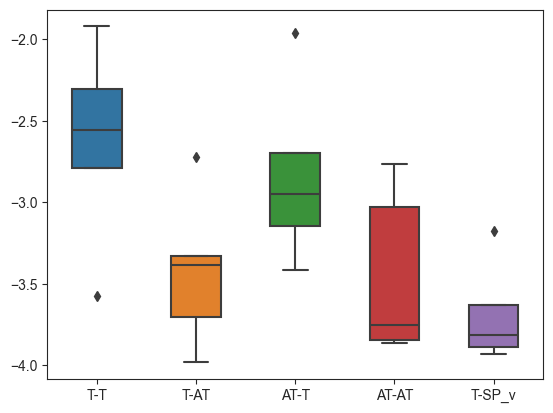

In [16]:

condition_boxplot(agent_pseudogapping_df)
plt.savefig("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/BERT_Agent_Pseudogapping_boxplot.png")
tikzplotlib.save("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/file_tex /BERT_Agent_Pseudogapping_boxplot.tex")


# Semantic role: PATIENT

In [5]:
patient_df = ellipsis_df[ellipsis_df['Semantic_Role'] == 'Patient']
patient_df

,ID,Condition,Sentence,Construction,Semantic_Role,Sentence_score_(GPT),Sentence_score_(BERT)
125,26,T – T,"The journalist writes an article, and the prof...",Gapping,Patient,-4.143632,-1.647472
126,26,T – AT,"The journalist writes an article, and the prof...",Gapping,Patient,-4.719871,-2.427903
127,26,AT – T,"The journalist writes a song, and the professo...",Gapping,Patient,-4.532803,-2.292714
128,26,AT – AT,"The journalist writes a song, and the professo...",Gapping,Patient,-5.343615,-2.909625
129,26,T – SP violation,"The journalist writes an article, and the prof...",Gapping,Patient,-5.212647,-2.799688
...,...,...,...,...,...,...,...
245,50,T – T,"The speleologist is examining something, but w...",Sluicing,Patient,-4.754624,-2.698962
246,50,T – AT,"The speleologist is examining something, but w...",Sluicing,Patient,-5.257351,-3.130686
247,50,AT – T,"The speleologist is examining someone, but we ...",Sluicing,Patient,-5.100238,-3.085067
248,50,AT – AT,"The speleologist is examining someone, but we ...",Sluicing,Patient,-4.983162,-2.654625


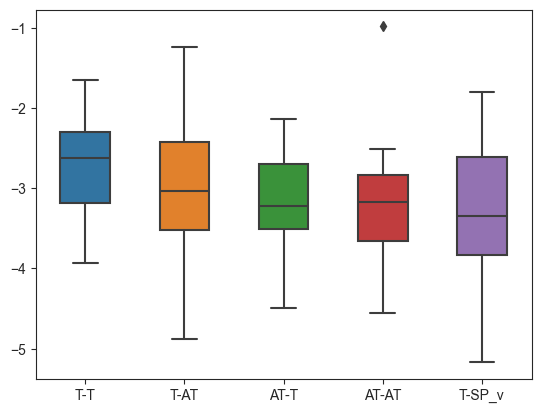

In [18]:
condition_boxplot(patient_df)
plt.savefig("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/BERT_Patient_boxplot.png")
tikzplotlib.save("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/file_tex /BERT_Patient_boxplot.tex")



In [19]:
patient_df.Construction.unique()

array(['Gapping', 'Pseudo-gapping', 'Sluicing'], dtype=object)

In [20]:
patient_gapping_df = patient_df[patient_df['Construction'] == 'Gapping']
patient_pseudogapping_df = patient_df[patient_df['Construction'] == 'Pseudo-gapping']
patient_sluicing_df = patient_df[patient_df['Construction'] == 'Sluicing']

## Gapping

In [21]:
patient_gapping_df

,ID,Condition,Sentence,Construction,Semantic_Role,Sentence_score_(GPT),Sentence_score_(BERT)
125,26,T – T,"The journalist writes an article, and the prof...",Gapping,Patient,-4.143632,-1.647472
126,26,T – AT,"The journalist writes an article, and the prof...",Gapping,Patient,-4.719871,-2.427903
127,26,AT – T,"The journalist writes a song, and the professo...",Gapping,Patient,-4.532803,-2.292714
128,26,AT – AT,"The journalist writes a song, and the professo...",Gapping,Patient,-5.343615,-2.909625
129,26,T – SP violation,"The journalist writes an article, and the prof...",Gapping,Patient,-5.212647,-2.799688
130,27,T – T,"The violinist will play the violin, and the mu...",Gapping,Patient,-3.767537,-1.930878
131,27,T – AT,"The violinist will play the violin, and the mu...",Gapping,Patient,-4.245248,-2.374123
132,27,AT – T,"The violinist will play the trumpet, and the m...",Gapping,Patient,-4.217348,-2.408267
133,27,AT – AT,"The violinist will play the trumpet, and the m...",Gapping,Patient,-4.611973,-2.665044
134,27,T – SP violation,"The violinist will play the violin, and the mu...",Gapping,Patient,-4.040233,-2.095673


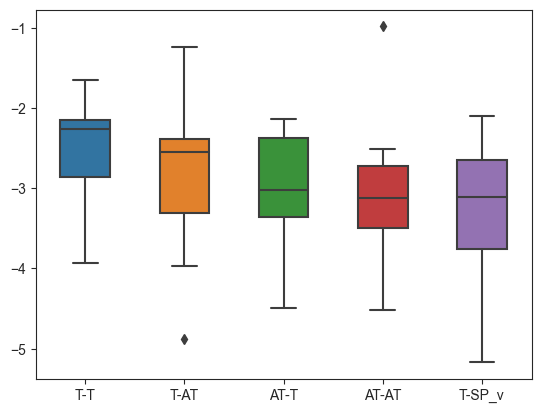

In [22]:

condition_boxplot(patient_gapping_df)
plt.savefig("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/BERT_Patient_Gapping_boxplot.png")
tikzplotlib.save("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/file_tex /BERT_Patient_Gapping_boxplot.tex")


## Pseudo-gapping

In [23]:
patient_pseudogapping_df

,ID,Condition,Sentence,Construction,Semantic_Role,Sentence_score_(GPT),Sentence_score_(BERT)
175,36,T – T,"The cook will mix ingredients, and the chemist...",Pseudo-gapping,Patient,-5.068490,-3.293887
176,36,T – AT,"The cook will mix ingredients, and the chemist...",Pseudo-gapping,Patient,-5.236281,-3.179381
177,36,AT – T,"The cook will mix the paint, and the chemist w...",Pseudo-gapping,Patient,-5.219449,-3.513435
178,36,AT – AT,"The cook will mix the paint, and the chemist w...",Pseudo-gapping,Patient,-5.221858,-3.398435
179,36,T – SP violation,"The cook will mix ingredients, and the chemist...",Pseudo-gapping,Patient,-5.406130,-2.537962
180,37,T – T,"The child will drink the coke, and the student...",Pseudo-gapping,Patient,-4.350747,-2.499301
181,37,T – AT,"The child will drink the coke, and the student...",Pseudo-gapping,Patient,-4.533371,-2.636253
182,37,AT – T,"The child will drink the beer, and the student...",Pseudo-gapping,Patient,-4.253474,-2.720755
183,37,AT – AT,"The child will drink the beer, and the student...",Pseudo-gapping,Patient,-4.681170,-3.058022
184,37,T – SP violation,"The child will drink the coke, and the student...",Pseudo-gapping,Patient,-4.405658,-2.451916


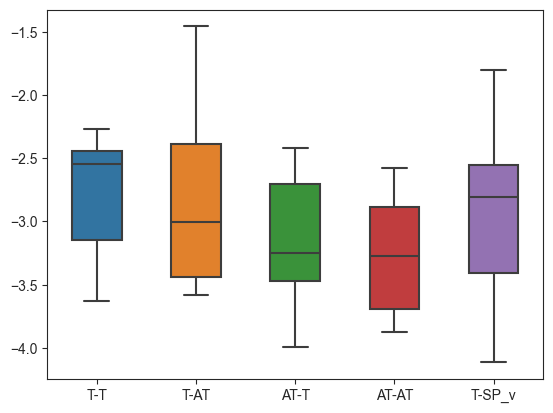

In [24]:

condition_boxplot(patient_pseudogapping_df)
plt.savefig("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/BERT_Patient_PseudoGapping_boxplot.png")
tikzplotlib.save("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/file_tex /BERT_Patient_PseudoGapping_boxplot.tex")


## Sluicing

In [25]:
patient_sluicing_df

,ID,Condition,Sentence,Construction,Semantic_Role,Sentence_score_(GPT),Sentence_score_(BERT)
225,46,T – T,"I know the electrician is checking something, ...",Sluicing,Patient,-4.030965,-2.617175
226,46,T – AT,"I know the electrician is checking something, ...",Sluicing,Patient,-4.276752,-3.140550
227,46,AT – T,"I know the electrician is checking someone, bu...",Sluicing,Patient,-4.591450,-3.112265
228,46,AT – AT,"I know the electrician is checking someone, bu...",Sluicing,Patient,-4.463396,-3.068766
229,46,T – SP violation,"I know the electrician is checking something, ...",Sluicing,Patient,-4.497878,-3.349877
230,47,T – T,"The dog carried something, but I didn’t know w...",Sluicing,Patient,-4.667956,-3.893448
231,47,T – AT,"The dog carried something, but I didn’t know w...",Sluicing,Patient,-5.225662,-4.799194
232,47,AT – T,"The dog carried someone, but I didn’t know what.",Sluicing,Patient,-5.175612,-4.191387
233,47,AT – AT,"The dog carried someone, but I didn’t know when.",Sluicing,Patient,-5.465302,-4.553162
234,47,T – SP violation,"The dog carried something, but I didn’t know ...",Sluicing,Patient,-6.458727,-4.730308


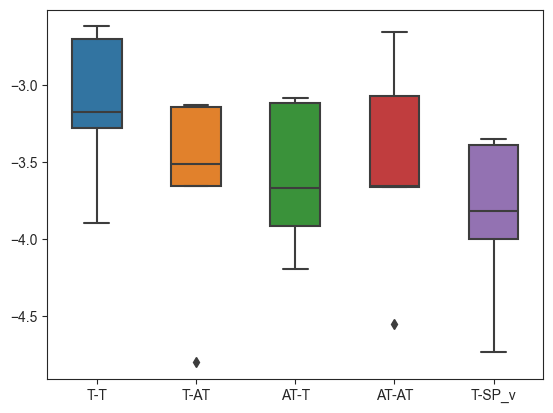

In [26]:

condition_boxplot(patient_sluicing_df)
plt.savefig("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/BERT_Patient_Sluicing_boxplot.png")
tikzplotlib.save("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/file_tex /BERT_Patient_Sluicing_boxplot.tex")


# Semantic role: INSTRUMENT

In [6]:
instrument_df = ellipsis_df[ellipsis_df['Semantic_Role'] == 'Instrument']
instrument_df

,ID,Condition,Sentence,Construction,Semantic_Role,Sentence_score_(GPT),Sentence_score_(BERT)
250,51,T – T,The businessman paid the bill with his credit ...,VP-ellipsis,Instrument,-3.778279,-2.275819
251,51,T – AT,The businessman paid the bill with his credit ...,VP-ellipsis,Instrument,-3.870509,-2.988424
252,51,AT – T,"The businessman paid the bill with coins, and ...",VP-ellipsis,Instrument,-4.649913,-2.604981
253,51,AT – AT,"The businessman paid the bill with coins, and ...",VP-ellipsis,Instrument,-4.557084,-3.672676
254,51,T – SP violation,The businessman paid the bill with his credit ...,VP-ellipsis,Instrument,-3.899933,-2.275034
...,...,...,...,...,...,...,...
370,75,T – T,"The cook flipped the pancake with something, b...",Sluice-Stranding,Instrument,-5.028880,-3.926515
371,75,T – AT,"The cook flipped the pancake with something, b...",Sluice-Stranding,Instrument,-5.218618,-4.264818
372,75,AT – T,"The cook flipped the pancake with someone, but...",Sluice-Stranding,Instrument,-5.373381,-4.325524
373,75,AT – AT,"The cook flipped the pancake with someone, but...",Sluice-Stranding,Instrument,-5.243367,-4.289074


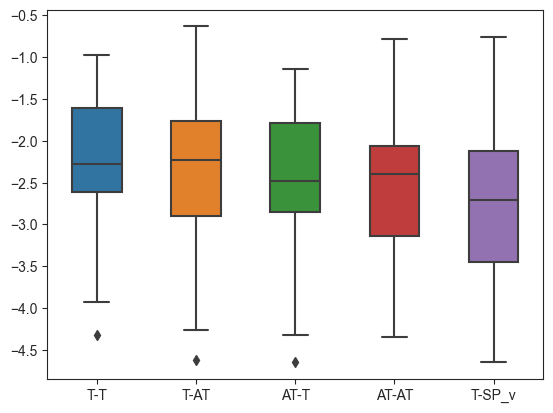

In [28]:
condition_boxplot(instrument_df)
plt.savefig("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/BERT_Instrument_boxplot.png")
tikzplotlib.save("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/file_tex /BERT_Instrument_boxplot.tex")

In [29]:
instrument_df.Construction.unique()

array(['VP-ellipsis', 'Do-x/ Do-so anaphora', 'Gapping', 'Pseudo-gapping',
       'Sluice-Stranding'], dtype=object)

In [30]:
instrument_vp_df = instrument_df[instrument_df['Construction'] == 'VP-ellipsis']
instrument_doAnaphora_df= instrument_df[instrument_df['Construction'] == 'Do-x/ Do-so anaphora']
instrument_gapping_df = instrument_df[instrument_df['Construction'] == 'Gapping']
instrument_pseudogapping_df = instrument_df[instrument_df['Construction'] == 'Pseudo-gapping']
instrument_sluiceStranding_df = instrument_df[instrument_df['Construction'] == 'Sluice-Stranding']

## Verb-phrase ellipsis (VP)


In [31]:
instrument_vp_df

,ID,Condition,Sentence,Construction,Semantic_Role,Sentence_score_(GPT),Sentence_score_(BERT)
250,51,T – T,The businessman paid the bill with his credit ...,VP-ellipsis,Instrument,-3.778279,-2.275819
251,51,T – AT,The businessman paid the bill with his credit ...,VP-ellipsis,Instrument,-3.870509,-2.988424
252,51,AT – T,"The businessman paid the bill with coins, and ...",VP-ellipsis,Instrument,-4.649913,-2.604981
253,51,AT – AT,"The businessman paid the bill with coins, and ...",VP-ellipsis,Instrument,-4.557084,-3.672676
254,51,T – SP violation,The businessman paid the bill with his credit ...,VP-ellipsis,Instrument,-3.899933,-2.275034
255,52,T – T,"The dog drank water with the bowl, and the man...",VP-ellipsis,Instrument,-3.872606,-2.276158
256,52,T – AT,"The dog drank water with the bowl, and the man...",VP-ellipsis,Instrument,-4.148947,-2.410574
257,52,AT – T,"The dog drank water with the bottle, and the m...",VP-ellipsis,Instrument,-4.189763,-2.052022
258,52,AT – AT,"The dog drank water with the bottle, and the m...",VP-ellipsis,Instrument,-4.303090,-2.510264
259,52,T – SP violation,"The dog drank water with the bowl, and the man...",VP-ellipsis,Instrument,-4.246269,-2.526779


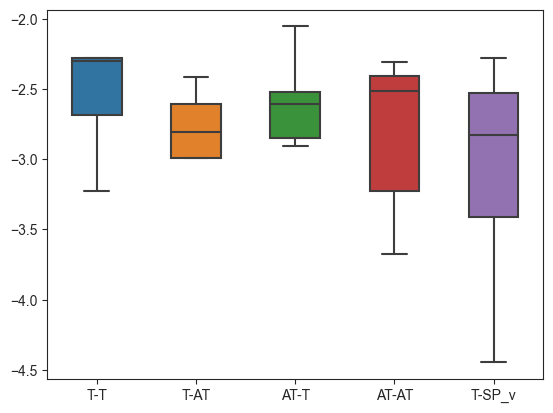

In [32]:
condition_boxplot(instrument_vp_df)
plt.savefig("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/BERT_Instrument_VPboxplot.png")
tikzplotlib.save("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/file_tex /BERT_Instrument_VPboxplot.tex")

## Do-x/ Do-so anaphora

In [33]:
instrument_doAnaphora_df

,ID,Condition,Sentence,Construction,Semantic_Role,Sentence_score_(GPT),Sentence_score_(BERT)
275,56,T – T,"The father drank milk with the cup, and the ne...",Do-x/ Do-so anaphora,Instrument,-3.953912,-2.230811
276,56,T – AT,"The father drank milk with the cup, and the ne...",Do-x/ Do-so anaphora,Instrument,-4.222988,-2.202558
277,56,AT – T,"The father drank milk with the dish, and the n...",Do-x/ Do-so anaphora,Instrument,-4.252942,-2.475567
278,56,AT – AT,"The father drank milk with the dish, and the n...",Do-x/ Do-so anaphora,Instrument,-4.205889,-2.555752
279,56,T – SP violation,"The father drank milk with the cup, and the ne...",Do-x/ Do-so anaphora,Instrument,-4.688754,-2.709274
280,57,T – T,"The mechanic fixed the bike with a wrench, and...",Do-x/ Do-so anaphora,Instrument,-4.226770,-1.097706
281,57,T – AT,"The mechanic fixed the bike with a wrench, and...",Do-x/ Do-so anaphora,Instrument,-4.557083,-1.761166
282,57,AT – T,"The mechanic fixed the bike with a tape, and s...",Do-x/ Do-so anaphora,Instrument,-4.276016,-1.779127
283,57,AT – AT,"The mechanic fixed the bike with a tape, and t...",Do-x/ Do-so anaphora,Instrument,-4.816203,-2.395711
284,57,T – SP violation,"The mechanic fixed the bike with a wrench, and...",Do-x/ Do-so anaphora,Instrument,-5.074363,-2.121336


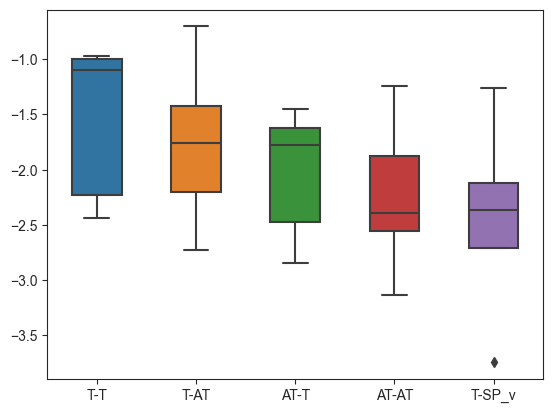

In [34]:
condition_boxplot(instrument_doAnaphora_df)
plt.savefig("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/BERT_Instrument_Do_an_boxplot.png")
tikzplotlib.save("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/file_tex /BERT_Instrument_Do_an_boxplot.tex")

## Gapping

In [35]:
instrument_gapping_df

,ID,Condition,Sentence,Construction,Semantic_Role,Sentence_score_(GPT),Sentence_score_(BERT)
300,61,T – T,"The child draws flowers with the pencil, and t...",Gapping,Instrument,-3.877789,-1.639200
301,61,T – AT,"The child draws flowers with the pencil, and t...",Gapping,Instrument,-4.357068,-2.042445
302,61,AT – T,"The child draws flowers with the scalpel, and ...",Gapping,Instrument,-3.963000,-1.835318
303,61,AT – AT,"The child draws flowers with the scalpel, and ...",Gapping,Instrument,-4.046906,-2.201232
304,61,T – SP violation,"The child draws flowers with the pencil, and t...",Gapping,Instrument,-4.883067,-3.204271
305,62,T – T,The hairstylist fixes the hair with the hairdr...,Gapping,Instrument,-3.155742,-1.050732
306,62,T – AT,The hairstylist fixes the hair with the hairdr...,Gapping,Instrument,-3.244464,-0.630586
307,62,AT – T,The hairstylist fixes the hair with the screwd...,Gapping,Instrument,-3.638986,-1.135779
308,62,AT – AT,The hairstylist fixes the hair with the screwd...,Gapping,Instrument,-3.641363,-0.785041
309,62,T – SP violation,The hairstylist fixes the hair with the hairdr...,Gapping,Instrument,-3.174361,-0.762444


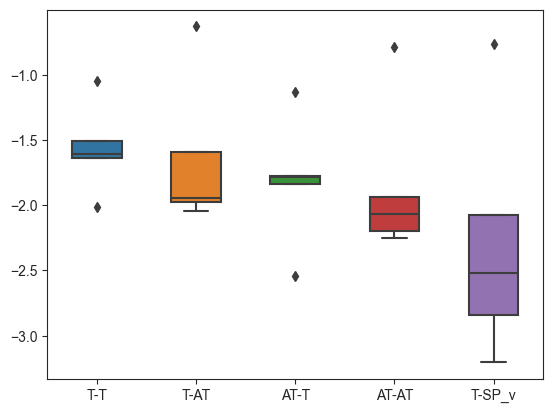

In [36]:
condition_boxplot(instrument_gapping_df)
plt.savefig("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/BERT_Instrument_Gapping_boxplot.png")
tikzplotlib.save("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/file_tex /BERT_Instrument_Gapping_boxplot.tex")

## Pseudo-gapping

In [37]:
instrument_pseudogapping_df

,ID,Condition,Sentence,Construction,Semantic_Role,Sentence_score_(GPT),Sentence_score_(BERT)
325,66,T – T,"The tourist will travel with the boat, and the...",Pseudo-gapping,Instrument,-4.304229,-2.612247
326,66,T – AT,"The tourist will travel with the boat, and the...",Pseudo-gapping,Instrument,-4.275641,-2.008074
327,66,AT – T,"The tourist will travel with the dinghy, and t...",Pseudo-gapping,Instrument,-4.305930,-2.123005
328,66,AT – AT,"The tourist will travel with the dinghy, and t...",Pseudo-gapping,Instrument,-4.554183,-1.698078
329,66,T – SP violation,"The tourist will travel with the boat, and the...",Pseudo-gapping,Instrument,-5.130645,-3.705833
330,67,T – T,"The fisherman will catch fish with the net, an...",Pseudo-gapping,Instrument,-4.007172,-1.986034
331,67,T – AT,"The fisherman will catch fish with the net, an...",Pseudo-gapping,Instrument,-4.247594,-2.397999
332,67,AT – T,"The fisherman will catch fish with the hammer,...",Pseudo-gapping,Instrument,-3.919284,-1.909743
333,67,AT – AT,"The fisherman will catch fish with the hammer,...",Pseudo-gapping,Instrument,-4.184681,-2.155615
334,67,T – SP violation,"The fisherman will catch fish with the net, an...",Pseudo-gapping,Instrument,-4.174304,-1.827589


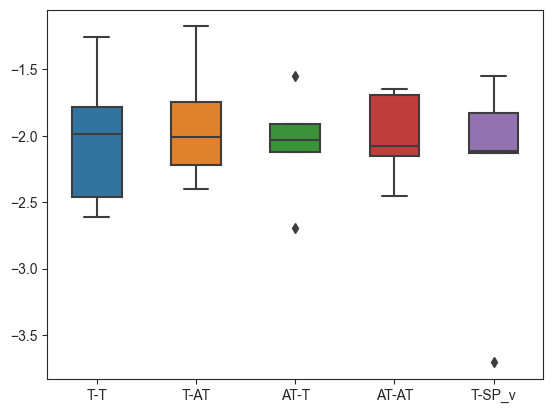

In [38]:
condition_boxplot(instrument_pseudogapping_df)
plt.savefig("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/BERT_Instrument_PseudoGapp_boxplot.png")
tikzplotlib.save("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/file_tex /BERT_Instrument_Pseudo_Gapp_boxplot.tex")

## Sluice-stranding

In [39]:
instrument_sluiceStranding_df

,ID,Condition,Sentence,Construction,Semantic_Role,Sentence_score_(GPT),Sentence_score_(BERT)
350,71,T – T,The policeman is hitting the demonstrator with...,Sluice-Stranding,Instrument,-4.667419,-2.565827
351,71,T – AT,The policeman is hitting the demonstrator with...,Sluice-Stranding,Instrument,-4.770670,-2.897103
352,71,AT – T,The policeman is hitting the demonstrator with...,Sluice-Stranding,Instrument,-5.125687,-3.082611
353,71,AT – AT,The policeman is hitting the demonstrator with...,Sluice-Stranding,Instrument,-5.169712,-3.051706
354,71,T – SP violation,The policeman is hitting the demonstrator with...,Sluice-Stranding,Instrument,-4.831783,-3.017997
355,72,T – T,The journalist is writing an article with some...,Sluice-Stranding,Instrument,-4.598575,-3.579286
356,72,T – AT,The journalist is writing an article with some...,Sluice-Stranding,Instrument,-4.840743,-3.990756
357,72,AT – T,The journalist is writing an article with some...,Sluice-Stranding,Instrument,-4.582922,-3.572974
358,72,AT – AT,The journalist is writing an article with some...,Sluice-Stranding,Instrument,-4.561352,-3.505586
359,72,T – SP violation,The journalist is writing an article with some...,Sluice-Stranding,Instrument,-4.870971,-3.716862


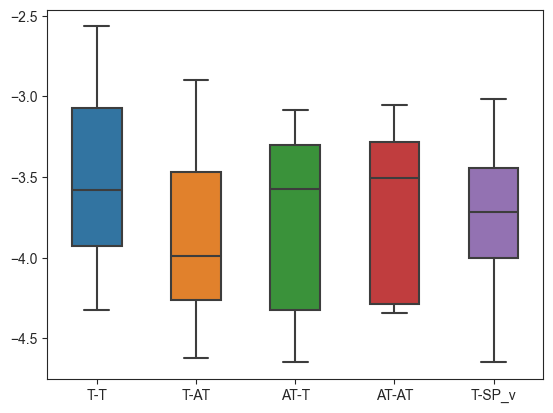

In [40]:
condition_boxplot(instrument_sluiceStranding_df)
plt.savefig("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/BERT_Instrument_SluiceStr_boxplot.png")
tikzplotlib.save("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/file_tex /BERT_Instrument_SluiceStr_boxplot.tex")

# Semantic role: TIME

In [7]:
time_df = ellipsis_df[ellipsis_df['Semantic_Role'] == 'Time']
time_df

,ID,Condition,Sentence,Construction,Semantic_Role,Sentence_score_(GPT),Sentence_score_(BERT)
475,96,T – T,The student completed the project before the e...,VP-ellipsis,Time,-4.920945,-4.064247
476,96,T – AT,The student completed the project before the e...,VP-ellipsis,Time,-5.067224,-4.389719
477,96,AT – T,The student completed the project before the e...,VP-ellipsis,Time,-5.326908,-4.487233
478,96,AT – AT,The student completed the project before the e...,VP-ellipsis,Time,-5.413906,-4.728012
479,96,T – SP violation,The student completed the project before the e...,VP-ellipsis,Time,-5.154288,-4.613521
...,...,...,...,...,...,...,...
570,115,T – T,"The tourist packed his bags before departure, ...",Pseudo-gapping,Time,-4.857551,-3.447699
571,115,T – AT,"The tourist packed his bags before departure, ...",Pseudo-gapping,Time,-4.841784,-3.416409
572,115,AT – T,The tourist packed his bags before the meeting...,Pseudo-gapping,Time,-4.687409,-3.594338
573,115,AT – AT,"The tourist packed his bags before meeting, an...",Pseudo-gapping,Time,-5.382345,-3.705495


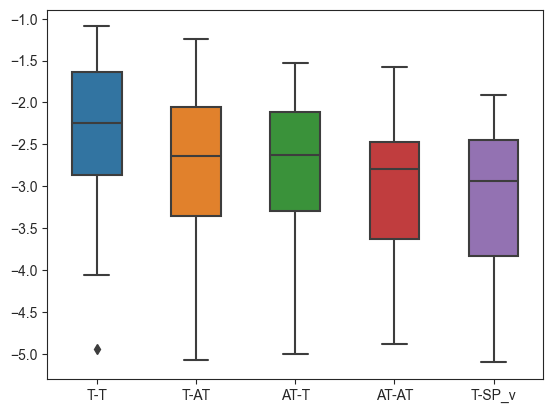

In [42]:
condition_boxplot(time_df)
plt.savefig("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/BERT_Time_boxplot.png")
tikzplotlib.save("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/file_tex /BERT_Time_boxplot.tex")

In [43]:
time_df.Construction.unique()

array(['VP-ellipsis', 'Do-x/ Do-so anaphora', 'Gapping', 'Pseudo-gapping'],
      dtype=object)

In [44]:
time_vp_df = time_df[time_df['Construction'] == 'VP-ellipsis']
time_doAnaphora_df= time_df[time_df['Construction'] == 'Do-x/ Do-so anaphora']
time_gapping_df = time_df[time_df['Construction'] == 'Gapping']
time_pseudogapping_df = time_df[time_df['Construction'] == 'Pseudo-gapping']


## Verb-phrase ellipsis (VP)


In [45]:
time_vp_df

,ID,Condition,Sentence,Construction,Semantic_Role,Sentence_score_(GPT),Sentence_score_(BERT)
475,96,T – T,The student completed the project before the e...,VP-ellipsis,Time,-4.920945,-4.064247
476,96,T – AT,The student completed the project before the e...,VP-ellipsis,Time,-5.067224,-4.389719
477,96,AT – T,The student completed the project before the e...,VP-ellipsis,Time,-5.326908,-4.487233
478,96,AT – AT,The student completed the project before the e...,VP-ellipsis,Time,-5.413906,-4.728012
479,96,T – SP violation,The student completed the project before the e...,VP-ellipsis,Time,-5.154288,-4.613521
480,97,T – T,The passenger buys a ticket before the departu...,VP-ellipsis,Time,-5.078840,-2.837459
481,97,T – AT,The passenger buys a ticket before the departu...,VP-ellipsis,Time,-5.505591,-3.357381
482,97,AT – T,The passenger buys a ticket before the meeting...,VP-ellipsis,Time,-5.315173,-3.288807
483,97,AT – AT,The passenger buys a ticket before the meeting...,VP-ellipsis,Time,-5.702533,-3.646376
484,97,T – SP violation,The passenger buys a ticket before the departu...,VP-ellipsis,Time,-5.600336,-3.771465


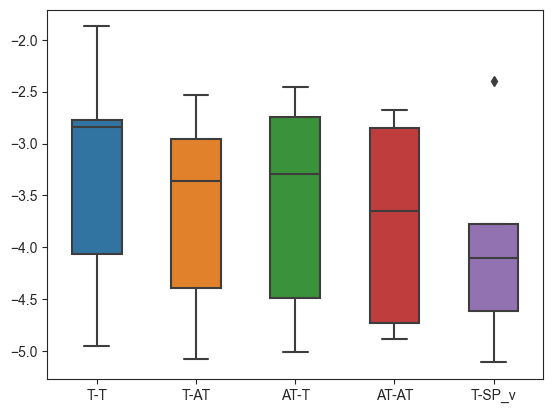

In [46]:
condition_boxplot(time_vp_df)
plt.savefig("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/BERT_Time_VP_boxplot.png")
tikzplotlib.save("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/file_tex /BERT_Time_VP_boxplot.tex")

## Do-x/ Do-so anaphora

In [47]:
time_doAnaphora_df

,ID,Condition,Sentence,Construction,Semantic_Role,Sentence_score_(GPT),Sentence_score_(BERT)
500,101,T – T,"The cook washed his hands before cooking, and ...",Do-x/ Do-so anaphora,Time,-3.613178,-1.091518
501,101,T – AT,"The cook washed his hands before cooking, and ...",Do-x/ Do-so anaphora,Time,-4.247749,-1.244182
502,101,AT – T,"The cook washed his hands before the match, an...",Do-x/ Do-so anaphora,Time,-3.765883,-2.022122
503,101,AT – AT,"The cook washed his hands before the match, an...",Do-x/ Do-so anaphora,Time,-3.832874,-2.004380
504,101,T – SP violation,"The cook washed his hands before cooking, and ...",Do-x/ Do-so anaphora,Time,-4.041145,-1.917107
505,102,T – T,The professor spoke to the audience during the...,Do-x/ Do-so anaphora,Time,-3.908630,-1.761995
506,102,T – AT,The professor spoke to the audience during the...,Do-x/ Do-so anaphora,Time,-4.222987,-2.087338
507,102,AT – T,The professor spoke to the audience during the...,Do-x/ Do-so anaphora,Time,-4.109473,-2.184158
508,102,AT – AT,The professor spoke to the audience during the...,Do-x/ Do-so anaphora,Time,-4.452440,-2.313451
509,102,T – SP violation,The professor spoke to the audience during the...,Do-x/ Do-so anaphora,Time,-4.487761,-3.087054


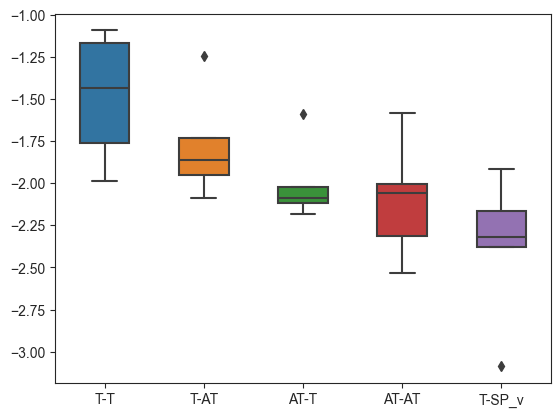

In [48]:
condition_boxplot(time_doAnaphora_df)
plt.savefig("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/BERT_Time_Do_an_boxplot.png")
tikzplotlib.save("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/file_tex /BERT_Time_Do_an_boxplot.tex")

## Gapping

In [49]:
time_gapping_df

,ID,Condition,Sentence,Construction,Semantic_Role,Sentence_score_(GPT),Sentence_score_(BERT)
525,106,T – T,The tourist visits some museums during the vac...,Gapping,Time,-4.254142,-2.946596
526,106,T – AT,The tourist visits some museums during the vac...,Gapping,Time,-4.509090,-3.694687
527,106,AT – T,The tourist visits some museums during the par...,Gapping,Time,-4.463005,-3.164349
528,106,AT – AT,The tourist visits some museums during the par...,Gapping,Time,-4.651614,-3.633492
529,106,T – SP violation,The tourist visits some museums during the vac...,Gapping,Time,-5.303795,-4.041283
530,107,T – T,The bride put on her makeup before the ceremon...,Gapping,Time,-3.449018,-1.403726
531,107,T – AT,The bride put on her makeup before the ceremon...,Gapping,Time,-3.967061,-2.070732
532,107,AT – T,"The bride put on her makeup before the party, ...",Gapping,Time,-3.670086,-1.532593
533,107,AT – AT,"The bride put on her makeup before the party, ...",Gapping,Time,-4.156594,-2.267815
534,107,T – SP violation,The bride put on her makeup before the marriag...,Gapping,Time,-4.570850,-2.730717


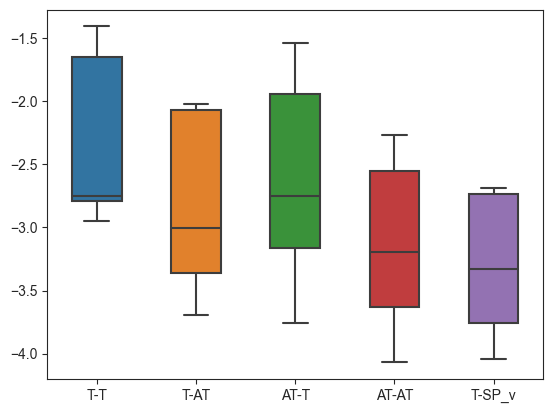

In [50]:
condition_boxplot(time_gapping_df)
plt.savefig("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/BERT_Time_Gapping_boxplot.png")
tikzplotlib.save("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/file_tex /BERT_Time_Gapping_boxplot.tex")

## Pseudo-gapping

In [51]:
time_pseudogapping_df

,ID,Condition,Sentence,Construction,Semantic_Role,Sentence_score_(GPT),Sentence_score_(BERT)
550,111,T – T,The runner will drink some water after the rac...,Pseudo-gapping,Time,-3.633005,-1.586259
551,111,T – AT,The runner will drink some water after the rac...,Pseudo-gapping,Time,-3.878558,-2.247532
552,111,AT – T,The runner will drink some water after the con...,Pseudo-gapping,Time,-4.163599,-2.132776
553,111,AT – AT,The runner will drink some water after the con...,Pseudo-gapping,Time,-4.382528,-2.732604
554,111,T – SP violation,The runner will drink some water after the rac...,Pseudo-gapping,Time,-4.025715,-2.795696
555,112,T – T,"The spectator will cry during the film, and th...",Pseudo-gapping,Time,-4.941450,-2.976662
556,112,T – AT,"The spectator will cry during the film, and th...",Pseudo-gapping,Time,-5.122121,-2.910530
557,112,AT – T,"The spectator will cry during the conference, ...",Pseudo-gapping,Time,-5.248770,-3.328052
558,112,AT – AT,"The spectator will cry during the conference, ...",Pseudo-gapping,Time,-5.296036,-3.020971
559,112,T – SP violation,"The spectator will cry during the film, and th...",Pseudo-gapping,Time,-4.785474,-2.661896


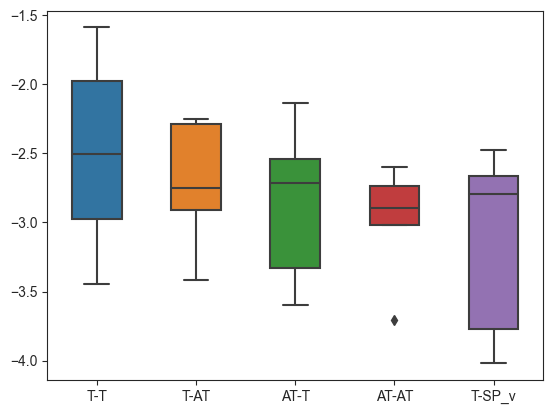

In [52]:
condition_boxplot(time_pseudogapping_df)
plt.savefig("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/BERT_Time_PseudoGapp_boxplot.png")
tikzplotlib.save("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/file_tex /BERT_Time_PseudoGapp_boxplot.tex")

# Semantic role: LOCATION

In [8]:
location_df = ellipsis_df[ellipsis_df['Semantic_Role'] == 'Location']
location_df

,ID,Condition,Sentence,Construction,Semantic_Role,Sentence_score_(GPT),Sentence_score_(BERT)
375,76,T – T,The housewife cleaned the table in the kitchen...,VP-ellipsis,Location,-4.576033,-3.524812
376,76,T – AT,The housewife cleaned the table in the kitchen...,VP-ellipsis,Location,-4.884039,-4.010006
377,76,AT – T,"The housewife cleaned the table in the armory,...",VP-ellipsis,Location,-4.859828,-3.438870
378,76,AT – AT,"The housewife cleaned the table in the armory,...",VP-ellipsis,Location,-5.029653,-3.857178
379,76,T – SP violation,The housewife cleaned the table in the kitchen...,VP-ellipsis,Location,-5.156329,-4.349615
...,...,...,...,...,...,...,...
470,95,T – T,"The singer will perform in the stadium, and th...",Pseudo-gapping,Location,-3.867983,-1.568655
471,95,T – AT,"The singer will perform in the stadium, and th...",Pseudo-gapping,Location,-4.211236,-1.809201
472,95,AT – T,"The singer will perform on the beach, and the ...",Pseudo-gapping,Location,-3.989428,-1.807571
473,95,AT – AT,"The singer will perform on the beach, and the ...",Pseudo-gapping,Location,-4.209736,-1.780445


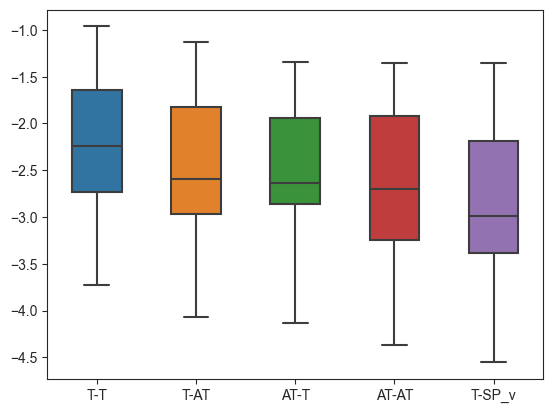

In [54]:
condition_boxplot(location_df)
plt.savefig("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/BERT_Location_boxplot.png")
tikzplotlib.save("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/file_tex /BERT_Location_boxplot.tex")

In [55]:
location_df.Construction.unique()

array(['VP-ellipsis', 'Do-x/ Do-so anaphora', 'Gapping', 'Pseudo-gapping'],
      dtype=object)

In [56]:
location_vp_df = location_df[location_df['Construction'] == 'VP-ellipsis']
location_doAnaphora_df= location_df[location_df['Construction'] == 'Do-x/ Do-so anaphora']
location_gapping_df = location_df[location_df['Construction'] == 'Gapping']
location_pseudogapping_df = location_df[location_df['Construction'] == 'Pseudo-gapping']


## Verb-phrase ellipsis (VP)


In [57]:
location_vp_df

,ID,Condition,Sentence,Construction,Semantic_Role,Sentence_score_(GPT),Sentence_score_(BERT)
375,76,T – T,The housewife cleaned the table in the kitchen...,VP-ellipsis,Location,-4.576033,-3.524812
376,76,T – AT,The housewife cleaned the table in the kitchen...,VP-ellipsis,Location,-4.884039,-4.010006
377,76,AT – T,"The housewife cleaned the table in the armory,...",VP-ellipsis,Location,-4.859828,-3.438870
378,76,AT – AT,"The housewife cleaned the table in the armory,...",VP-ellipsis,Location,-5.029653,-3.857178
379,76,T – SP violation,The housewife cleaned the table in the kitchen...,VP-ellipsis,Location,-5.156329,-4.349615
380,77,T – T,"The student used the computer in the library, ...",VP-ellipsis,Location,-3.634968,-1.940845
381,77,T – AT,"The student used the computer in the library, ...",VP-ellipsis,Location,-3.999840,-2.297971
382,77,AT – T,The student used the computer in the helicopte...,VP-ellipsis,Location,-4.181096,-2.751824
383,77,AT – AT,The student used the computer in the helicopte...,VP-ellipsis,Location,-4.467141,-2.743763
384,77,T – SP violation,"The student used the computer in the library, ...",VP-ellipsis,Location,-4.178253,-3.020022


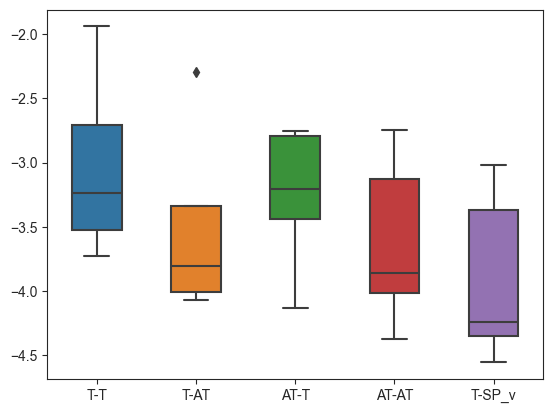

In [58]:
condition_boxplot(location_vp_df)
plt.savefig("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/BERT_Location_VP_boxplot.png")
tikzplotlib.save("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/file_tex /BERT_Location_VP_boxplot.tex")

## Do-x/ Do-so anaphora

In [59]:
location_doAnaphora_df

,ID,Condition,Sentence,Construction,Semantic_Role,Sentence_score_(GPT),Sentence_score_(BERT)
400,81,T – T,"The refugees found shelter in the church, and ...",Do-x/ Do-so anaphora,Location,-4.152184,-1.666645
401,81,T – AT,"The refugees found shelter in the church, and ...",Do-x/ Do-so anaphora,Location,-4.523257,-1.829080
402,81,AT – T,"The refugees found shelter in the bakery, and ...",Do-x/ Do-so anaphora,Location,-4.338147,-1.981171
403,81,AT – AT,"The refugees found shelter in the bakery, and ...",Do-x/ Do-so anaphora,Location,-4.618865,-2.084960
404,81,T – SP violation,"The refugees found shelter in the church, and ...",Do-x/ Do-so anaphora,Location,-4.658219,-2.950242
405,82,T – T,"The dog played with his owner in the park, and...",Do-x/ Do-so anaphora,Location,-2.868268,-0.989231
406,82,T – AT,"The dog played with his owner in the park, and...",Do-x/ Do-so anaphora,Location,-3.045563,-1.171298
407,82,AT – T,The dog played with his owner in the auditoriu...,Do-x/ Do-so anaphora,Location,-3.389484,-1.474010
408,82,AT – AT,The dog played with his owner in the auditoriu...,Do-x/ Do-so anaphora,Location,-3.229924,-1.596407
409,82,T – SP violation,"The dog played with his owner in the park, and...",Do-x/ Do-so anaphora,Location,-3.202283,-1.352637


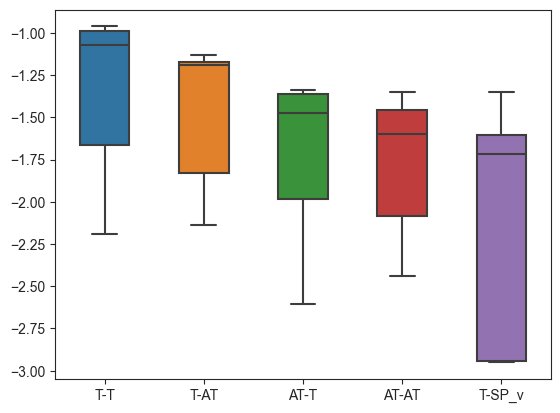

In [60]:
condition_boxplot(location_doAnaphora_df)
plt.savefig("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/BERT_Location_Do_an_boxplot.png")
tikzplotlib.save("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/file_tex /BERT_Location_Do_an_boxplot.tex")

## Gapping

In [61]:
location_gapping_df

,ID,Condition,Sentence,Construction,Semantic_Role,Sentence_score_(GPT),Sentence_score_(BERT)
425,86,T – T,"The cameraman is recording a video on the set,...",Gapping,Location,-4.343285,-2.814797
426,86,T – AT,"The cameraman is recording a video on the set,...",Gapping,Location,-4.148884,-2.758731
427,86,AT – T,The cameraman is recording a video in the gree...,Gapping,Location,-4.284833,-2.661229
428,86,AT – AT,The cameraman is recording a video in the gree...,Gapping,Location,-4.152650,-2.651209
429,86,T – SP violation,"The cameraman is recording a video on the set,...",Gapping,Location,-4.251719,-2.944389
430,87,T – T,The professor opens the congress in the univer...,Gapping,Location,-4.159315,-2.845694
431,87,T – AT,The professor opens the congress in the univer...,Gapping,Location,-4.695210,-3.203371
432,87,AT – T,The professor opens the congress in the univer...,Gapping,Location,-4.695210,-3.203371
433,87,AT – AT,The professor opens the congress in the circus...,Gapping,Location,-4.936699,-3.558194
434,87,T – SP violation,The professor opens the congress in the univer...,Gapping,Location,-5.257739,-4.143677


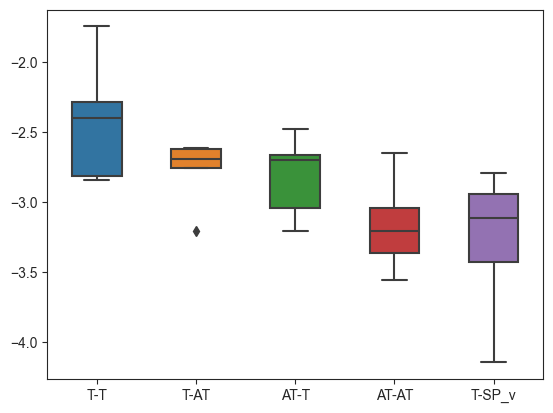

In [62]:
condition_boxplot(location_gapping_df)
plt.savefig("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/BERT_Location_Gapping_boxplot.png")
tikzplotlib.save("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/file_tex /BERT_Location_Gapping_boxplot.tex")

## Pseudo-gapping

In [63]:
location_pseudogapping_df

,ID,Condition,Sentence,Construction,Semantic_Role,Sentence_score_(GPT),Sentence_score_(BERT)
450,91,T – T,"The mother will cook the pizza in the oven, an...",Pseudo-gapping,Location,-3.645424,-1.879169
451,91,T – AT,"The mother will cook the pizza in the oven, an...",Pseudo-gapping,Location,-3.614749,-1.895824
452,91,AT – T,The mother will cook the pizza in the microwav...,Pseudo-gapping,Location,-3.859900,-2.000813
453,91,AT – AT,The mother will cook the pizza in the microwav...,Pseudo-gapping,Location,-3.830062,-2.039466
454,91,T – SP violation,The mother will cook the pizza in the microwav...,Pseudo-gapping,Location,-3.830062,-2.039466
455,92,T – T,The doctor will wear the white coat in the hos...,Pseudo-gapping,Location,-3.213052,-1.189800
456,92,T – AT,The doctor will wear the white coat in the hos...,Pseudo-gapping,Location,-3.519241,-1.217486
457,92,AT – T,The doctor will wear the white coat in the gym...,Pseudo-gapping,Location,-3.394245,-1.478339
458,92,AT – AT,The doctor will wear the white coat in the gym...,Pseudo-gapping,Location,-3.906423,-1.461785
459,92,T – SP violation,The doctor will wear the white coat in the hos...,Pseudo-gapping,Location,-4.259663,-1.590322


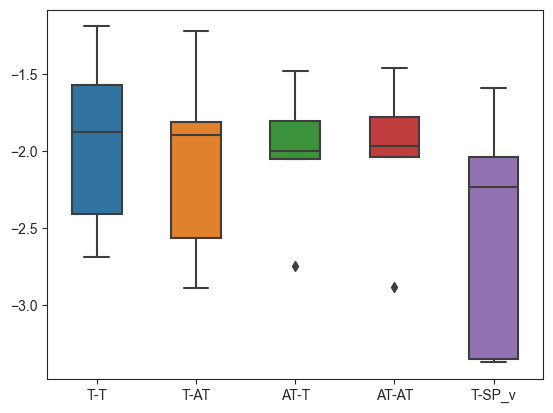

In [64]:
condition_boxplot(location_pseudogapping_df)
plt.savefig("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/BERT_Location_PseudoGapp_boxplot.png")
tikzplotlib.save("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/file_tex /BERT_Location_PseudoGapp_boxplot.tex")

# Analysis per constructions

In [65]:
vp_df = ellipsis_df[ellipsis_df['Construction'] == 'VP-ellipsis']
do_anaphora_df = ellipsis_df[ellipsis_df['Construction'] == 'Do-x/ Do-so anaphora']
gapping_df = ellipsis_df[ellipsis_df['Construction'] == 'Gapping']
pseudo_gapping_df = ellipsis_df[ellipsis_df['Construction'] == 'Pseudo-gapping']
sluicing_df = ellipsis_df[ellipsis_df['Construction'] == 'Sluicing']
sluice_stranding_df = ellipsis_df[ellipsis_df['Construction'] == 'Sluice-Stranding']
sluicing = ellipsis_df[ellipsis_df['Construction'] == 'Sluicing']
sluice_stranding = ellipsis_df[ellipsis_df['Construction'] ==  'Sluice-Stranding' ]
sluicing_and_sluice_stranding = pd.concat([sluicing, sluice_stranding], ignore_index=True)


In [66]:
vp_df

,ID,Condition,Sentence,Construction,Semantic_Role,Sentence_score_(GPT),Sentence_score_(BERT)
0,1,T – T,"The photographer used the camera, and the repo...",VP-ellipsis,Agent,-4.402376,-1.970236
1,1,T – AT,"The photographer used the camera, and the butc...",VP-ellipsis,Agent,-4.866790,-2.733161
2,1,AT – T,"The grandfather used the camera, and the repor...",VP-ellipsis,Agent,-4.994553,-3.296983
3,1,AT – AT,"The grandfather used the camera, and the butch...",VP-ellipsis,Agent,-5.207554,-3.541741
4,1,T – SP violation,"The photographer used the camera, and the bike...",VP-ellipsis,Agent,-4.508457,-2.668523
...,...,...,...,...,...,...,...
495,100,T – T,The soldier checked the rifle during the drill...,VP-ellipsis,Time,-5.461638,-4.945754
496,100,T – AT,The soldier checked the rifle during the drill...,VP-ellipsis,Time,-5.462261,-5.076704
497,100,AT – T,The soldier checked the rifle during the party...,VP-ellipsis,Time,-5.634771,-5.003985
498,100,AT – AT,The soldier checked the rifle during the party...,VP-ellipsis,Time,-5.400996,-4.883607


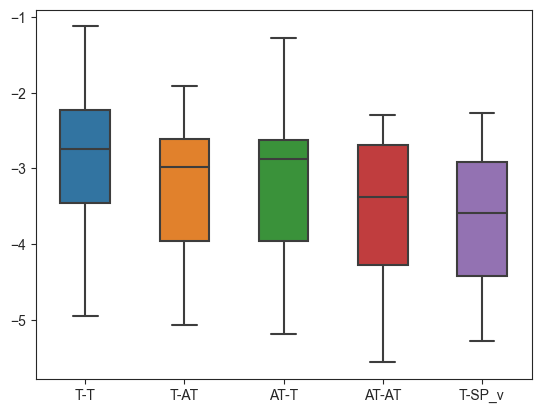

In [67]:
condition_boxplot(vp_df)
plt.savefig("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/BERT_VP_boxplot.png")
tikzplotlib.save("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/file_tex /BERT_VP_boxplot.tex")


In [68]:
do_anaphora_df

,ID,Condition,Sentence,Construction,Semantic_Role,Sentence_score_(GPT),Sentence_score_(BERT)
35,8,T – T,"The soldier wore a helmet, and so did the biker.",Do-x/ Do-so anaphora,Agent,-3.475001,-0.802291
36,8,T – AT,"The soldier wore a helmet, and so did the prof...",Do-x/ Do-so anaphora,Agent,-3.834262,-1.016768
37,8,AT – T,"The swimmer wore a helmet, and so did the biker.",Do-x/ Do-so anaphora,Agent,-3.529432,-1.101073
38,8,AT – AT,"The swimmer wore a helmet, and so did the prof...",Do-x/ Do-so anaphora,Agent,-3.742208,-1.566749
39,8,T – SP violation,"The soldier wore a helmet, and so did the tree.",Do-x/ Do-so anaphora,Agent,-3.802419,-1.281517
...,...,...,...,...,...,...,...
520,105,T – T,"The boxer delivered a punch during the fight, ...",Do-x/ Do-so anaphora,Time,-3.958158,-1.432759
521,105,T – AT,"The boxer delivered a punch during the fight, ...",Do-x/ Do-so anaphora,Time,-4.155639,-1.950711
522,105,AT – T,"The boxer delivered a punch during the fire, a...",Do-x/ Do-so anaphora,Time,-4.337245,-2.117029
523,105,AT – AT,"The boxer delivered a punch during the fire, a...",Do-x/ Do-so anaphora,Time,-4.732639,-2.531808


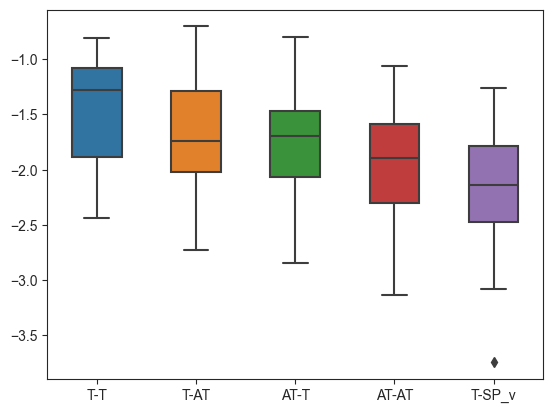

In [69]:
condition_boxplot(do_anaphora_df)
plt.savefig("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/BERT_DoAnaphora_boxplot.png")
tikzplotlib.save("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/file_tex /BERT_DoAnaphora_boxplot.tex")

In [70]:
gapping_df

,ID,Condition,Sentence,Construction,Semantic_Role,Sentence_score_(GPT),Sentence_score_(BERT)
70,15,T – T,"The pyromaniac starts the fire, and the pilot ...",Gapping,Agent,-4.340278,-2.754865
71,15,T – AT,"The pyromaniac starts the fire, and the singer...",Gapping,Agent,-4.253061,-2.569377
72,15,AT – T,"The biker starts the fire, and the pilot the r...",Gapping,Agent,-4.880644,-3.654390
73,15,AT – AT,"The biker starts the fire, and the singer the ...",Gapping,Agent,-4.999517,-3.303030
74,15,T – SP violation,"The pyromaniac starts the fire, and the leaf t...",Gapping,Agent,-4.500829,-3.567500
...,...,...,...,...,...,...,...
545,110,T – T,"The actor rehearsed before the play, and the s...",Gapping,Time,-3.837186,-1.647913
546,110,T – AT,"The actor rehearsed before the play, and the s...",Gapping,Time,-4.573763,-2.019827
547,110,AT – T,"The actor rehearsed before the festival, and t...",Gapping,Time,-4.066625,-1.937182
548,110,AT – AT,"The actor rehearsed before the festival, and t...",Gapping,Time,-5.095871,-2.550726


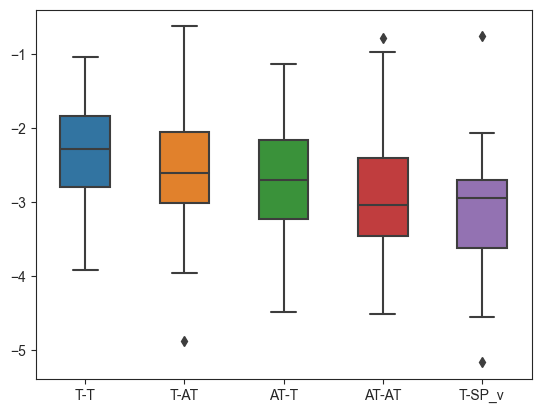

In [71]:
condition_boxplot(gapping_df)
plt.savefig("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/BERT_Gapping_boxplot.png")
tikzplotlib.save("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/file_tex /BERT_Gapping_boxplot.tex")

In [72]:
pseudo_gapping_df

,ID,Condition,Sentence,Construction,Semantic_Role,Sentence_score_(GPT),Sentence_score_(BERT)
100,21,T – T,"The nurse will wash the infant, and the hairst...",Pseudo-gapping,Agent,-4.198437,-2.304201
101,21,T – AT,"The nurse will wash the infant, and the banker...",Pseudo-gapping,Agent,-5.075160,-3.383588
102,21,AT – T,"The carpenter will wash the infant, and the ha...",Pseudo-gapping,Agent,-4.251953,-2.945778
103,21,AT – AT,"The carpenter will wash the infant, and the ba...",Pseudo-gapping,Agent,-5.026248,-3.751100
104,21,T – SP violation,"The nurse will wash the infant, and the jacket...",Pseudo-gapping,Agent,-5.362769,-3.812002
...,...,...,...,...,...,...,...
570,115,T – T,"The tourist packed his bags before departure, ...",Pseudo-gapping,Time,-4.857551,-3.447699
571,115,T – AT,"The tourist packed his bags before departure, ...",Pseudo-gapping,Time,-4.841784,-3.416409
572,115,AT – T,The tourist packed his bags before the meeting...,Pseudo-gapping,Time,-4.687409,-3.594338
573,115,AT – AT,"The tourist packed his bags before meeting, an...",Pseudo-gapping,Time,-5.382345,-3.705495


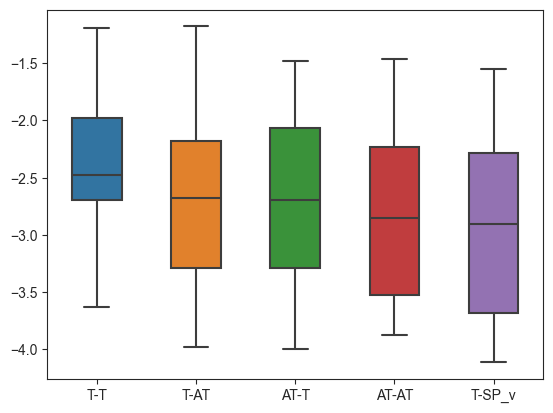

In [73]:
condition_boxplot(pseudo_gapping_df)
plt.savefig("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/BERT_PseudoGapping_boxplot.png")
tikzplotlib.save("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/file_tex /BERT_PseudoGapping_boxplot.tex")

In [74]:
sluicing_df

,ID,Condition,Sentence,Construction,Semantic_Role,Sentence_score_(GPT),Sentence_score_(BERT)
225,46,T – T,"I know the electrician is checking something, ...",Sluicing,Patient,-4.030965,-2.617175
226,46,T – AT,"I know the electrician is checking something, ...",Sluicing,Patient,-4.276752,-3.140550
227,46,AT – T,"I know the electrician is checking someone, bu...",Sluicing,Patient,-4.591450,-3.112265
228,46,AT – AT,"I know the electrician is checking someone, bu...",Sluicing,Patient,-4.463396,-3.068766
229,46,T – SP violation,"I know the electrician is checking something, ...",Sluicing,Patient,-4.497878,-3.349877
230,47,T – T,"The dog carried something, but I didn’t know w...",Sluicing,Patient,-4.667956,-3.893448
231,47,T – AT,"The dog carried something, but I didn’t know w...",Sluicing,Patient,-5.225662,-4.799194
232,47,AT – T,"The dog carried someone, but I didn’t know what.",Sluicing,Patient,-5.175612,-4.191387
233,47,AT – AT,"The dog carried someone, but I didn’t know when.",Sluicing,Patient,-5.465302,-4.553162
234,47,T – SP violation,"The dog carried something, but I didn’t know ...",Sluicing,Patient,-6.458727,-4.730308


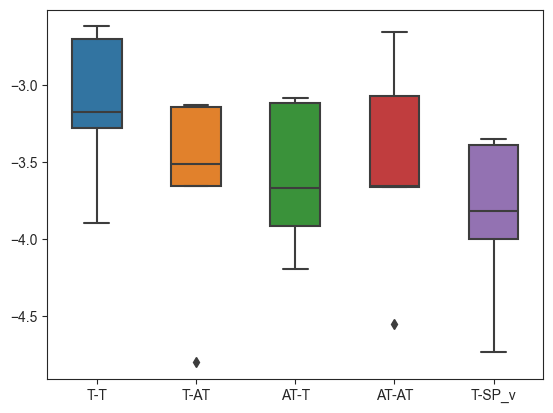

In [75]:
condition_boxplot(sluicing_df)
plt.savefig("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/BERT_Sluicing_boxplot.png")
tikzplotlib.save("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/file_tex /BERT_Sluicing_boxplot.tex")

In [76]:
sluice_stranding_df

,ID,Condition,Sentence,Construction,Semantic_Role,Sentence_score_(GPT),Sentence_score_(BERT)
350,71,T – T,The policeman is hitting the demonstrator with...,Sluice-Stranding,Instrument,-4.667419,-2.565827
351,71,T – AT,The policeman is hitting the demonstrator with...,Sluice-Stranding,Instrument,-4.770670,-2.897103
352,71,AT – T,The policeman is hitting the demonstrator with...,Sluice-Stranding,Instrument,-5.125687,-3.082611
353,71,AT – AT,The policeman is hitting the demonstrator with...,Sluice-Stranding,Instrument,-5.169712,-3.051706
354,71,T – SP violation,The policeman is hitting the demonstrator with...,Sluice-Stranding,Instrument,-4.831783,-3.017997
355,72,T – T,The journalist is writing an article with some...,Sluice-Stranding,Instrument,-4.598575,-3.579286
356,72,T – AT,The journalist is writing an article with some...,Sluice-Stranding,Instrument,-4.840743,-3.990756
357,72,AT – T,The journalist is writing an article with some...,Sluice-Stranding,Instrument,-4.582922,-3.572974
358,72,AT – AT,The journalist is writing an article with some...,Sluice-Stranding,Instrument,-4.561352,-3.505586
359,72,T – SP violation,The journalist is writing an article with some...,Sluice-Stranding,Instrument,-4.870971,-3.716862


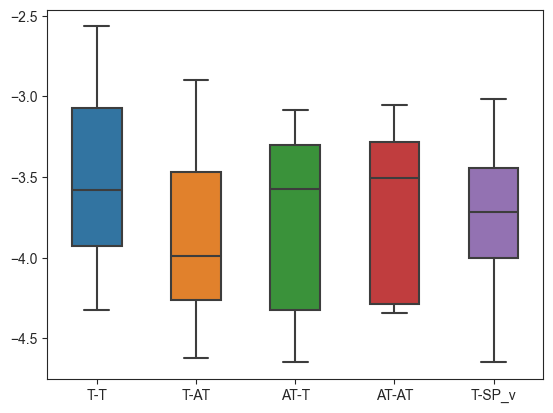

In [77]:
condition_boxplot(sluice_stranding_df)
plt.savefig("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/BERT_SluiceStr_boxplot.png")
tikzplotlib.save("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/file_tex /BERT_SluiceStr_boxplot.tex")

In [78]:
sluicing_and_sluice_stranding

,ID,Condition,Sentence,Construction,Semantic_Role,Sentence_score_(GPT),Sentence_score_(BERT)
0,46,T – T,"I know the electrician is checking something, ...",Sluicing,Patient,-4.030965,-2.617175
1,46,T – AT,"I know the electrician is checking something, ...",Sluicing,Patient,-4.276752,-3.140550
2,46,AT – T,"I know the electrician is checking someone, bu...",Sluicing,Patient,-4.591450,-3.112265
3,46,AT – AT,"I know the electrician is checking someone, bu...",Sluicing,Patient,-4.463396,-3.068766
4,46,T – SP violation,"I know the electrician is checking something, ...",Sluicing,Patient,-4.497878,-3.349877
5,47,T – T,"The dog carried something, but I didn’t know w...",Sluicing,Patient,-4.667956,-3.893448
6,47,T – AT,"The dog carried something, but I didn’t know w...",Sluicing,Patient,-5.225662,-4.799194
7,47,AT – T,"The dog carried someone, but I didn’t know what.",Sluicing,Patient,-5.175612,-4.191387
8,47,AT – AT,"The dog carried someone, but I didn’t know when.",Sluicing,Patient,-5.465302,-4.553162
9,47,T – SP violation,"The dog carried something, but I didn’t know ...",Sluicing,Patient,-6.458727,-4.730308


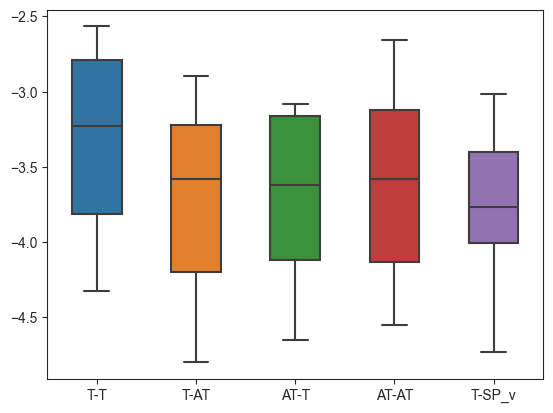

In [79]:
condition_boxplot(sluicing_and_sluice_stranding)
plt.savefig("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/BERT_Sluicing-SlStr_boxplot.png")
tikzplotlib.save("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/BERT/file_tex /BERT_Sluicing-SlStr_boxplot.tex")

In [10]:
mean_cond_agent = agent_df.groupby('Condition')['Sentence_score_(GPT)'].mean()
mean_cond_patient = patient_df.groupby('Condition')['Sentence_score_(GPT)'].mean()
mean_cond_instrument = instrument_df.groupby('Condition')['Sentence_score_(GPT)'].mean()
mean_cond_time = time_df.groupby('Condition')['Sentence_score_(GPT)'].mean()
mean_cond_location =location_df.groupby('Condition')['Sentence_score_(GPT)'].mean()

mean_Cond = pd.concat([mean_cond_agent, mean_cond_patient, mean_cond_instrument, mean_cond_time, mean_cond_location], axis = 1)
mean_Cond

,Sentence_score_(GPT),Sentence_score_(GPT),Sentence_score_(GPT),Sentence_score_(GPT),Sentence_score_(GPT)
Condition,,,,,
AT – AT,-4.907347,-5.044332,-4.490215,-4.852760,-4.497562
AT – T,-4.674135,-4.874788,-4.398410,-4.539760,-4.310295
T – AT,-4.650914,-4.825681,-4.391740,-4.660659,-4.308138
T – SP violation,-4.863820,-5.106049,-4.613507,-4.959277,-4.526281
T – T,-4.380415,-4.567584,-4.206597,-4.314910,-4.064337
